In [6]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
%matplotlib widget

In [7]:
from slam.basis import MixedOrderBasisCircuitTemplate
from slam.utils.gates.custom_gates import RiSwapGate, CustomCostGate
gate1 = RiSwapGate(1/2)
gate2 = RiSwapGate(1/3)
base_gates = [CustomCostGate.from_gate(gate1, cost=1/2), CustomCostGate.from_gate(gate2, cost=1/3)]
basis = MixedOrderBasisCircuitTemplate(base_gates=base_gates)

INFO:root:==== Working to build a set of covering polytopes ====


Considering $\sqrt[3]{iSwap}$;	Cost 0.3333333333333333 and Euclidean volume   0.00%
Considering $\sqrt[2]{iSwap}$;	Cost 0.5 and Euclidean volume   0.00%
Considering $\sqrt[3]{iSwap}$·$\sqrt[3]{iSwap}$;	Cost 0.6666666666666666 and Euclidean volume  14.81%
Considering $\sqrt[3]{iSwap}$·$\sqrt[2]{iSwap}$;	Cost 0.8333333333333333 and Euclidean volume  21.30%
Considering $\sqrt[2]{iSwap}$·$\sqrt[3]{iSwap}$;	Cost 0.8333333333333333 and Euclidean volume  21.30%
Considering $\sqrt[2]{iSwap}$·$\sqrt[2]{iSwap}$;	Cost 1.0 and Euclidean volume  50.00%
Considering $\sqrt[3]{iSwap}$·$\sqrt[3]{iSwap}$·$\sqrt[3]{iSwap}$;	Cost 1.0 and Euclidean volume  83.33%
Considering $\sqrt[3]{iSwap}$·$\sqrt[2]{iSwap}$·$\sqrt[3]{iSwap}$;	Cost 1.1666666666666665 and Euclidean volume  94.44%
Considering $\sqrt[3]{iSwap}$·$\sqrt[3]{iSwap}$·$\sqrt[2]{iSwap}$;	Cost 1.1666666666666665 and Euclidean volume  94.44%
Considering $\sqrt[2]{iSwap}$·$\sqrt[3]{iSwap}$·$\sqrt[3]{iSwap}$;	no ancestor, skipping.
Considering $\sqrt[

INFO:root:==== Done. Here's what we found: ====
INFO:root:Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 0.33	 | $\sqrt[3]{iSwap}$
  0.00% =    0/1    	 | 0.50	 | $\sqrt[2]{iSwap}$
 14.81% =    4/27   	 | 0.67	 | $\sqrt[3]{iSwap}$.$\sqrt[3]{iSwap}$
 21.30% =   23/108  	 | 0.83	 | $\sqrt[3]{iSwap}$.$\sqrt[2]{iSwap}$
 83.33% =    5/6    	 | 1.00	 | $\sqrt[3]{iSwap}$.$\sqrt[3]{iSwap}$.$\sqrt[3]{iSwap}$
 94.44% =   17/18   	 | 1.17	 | $\sqrt[3]{iSwap}$.$\sqrt[2]{iSwap}$.$\sqrt[3]{iSwap}$
 99.38% =  161/162  	 | 1.33	 | $\sqrt[3]{iSwap}$.$\sqrt[3]{iSwap}$.$\sqrt[3]{iSwap}$.$\sqrt[3]{iSwap}$
100.00% =    1/1    	 | 1.50	 | $\sqrt[3]{iSwap}$.$\sqrt[2]{iSwap}$.$\sqrt[3]{iSwap}$.$\sqrt[3]{iSwap}$



In [8]:
from slam.cost_function import BasicCost
objective = BasicCost()

In [9]:
from slam.optimizer import TemplateOptimizer
optimizer = TemplateOptimizer(basis=basis, objective=objective, use_callback=True)

In [10]:
from slam.sampler import Haar3Sample as HaarSample
sampler = HaarSample(n_samples=5)
ret = optimizer.approximate_from_distribution(sampler=sampler)

INFO:root:Starting sample iter 0
INFO:root:Begin search: (0.35779521, 0.20440797, 0.15889957)
INFO:root:Starting opt on template size 0
INFO:root:Break on cycle 0
INFO:root:Loss=2.1229595859040273e-10
INFO:root:Success: (0.35779521, 0.20440797, 0.15889957)
INFO:root:Starting sample iter 1
INFO:root:Begin search: (0.57183856, 0.30195239, 0.19848644)
INFO:root:Starting opt on template size 0
INFO:root:Break on cycle 0
INFO:root:Loss=1.7771117910569956e-11
INFO:root:Success: (0.57183856, 0.30195239, 0.19848644)
INFO:root:Starting sample iter 2
INFO:root:Begin search: (0.63370573, 0.25741641, 0.19934783)
INFO:root:Starting opt on template size 0
INFO:root:Break on cycle 0
INFO:root:Loss=3.4654568104031114e-10
INFO:root:Success: (0.63370573, 0.25741641, 0.19934783)
INFO:root:Starting sample iter 3
INFO:root:Begin search: (0.31487658, 0.22391286, 0.18920303)
INFO:root:Starting opt on template size 0
INFO:root:Break on cycle 0
INFO:root:Loss=3.663580550039569e-11
INFO:root:Success: (0.3148765

In [25]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
qc = QuantumCircuit(2)
qc.swap(0,1)
target = Operator(qc).data
optimizer.approximate_target_U(target_U=target)

INFO:root:Begin search: (0.5, 0.5, 0.5)
INFO:root:Starting opt on template size 0
INFO:root:Loss=2.931626941204968e-09


ValueError: Failed to converge. Try increasing restart attempts or increasing temperature scaling on preseed.

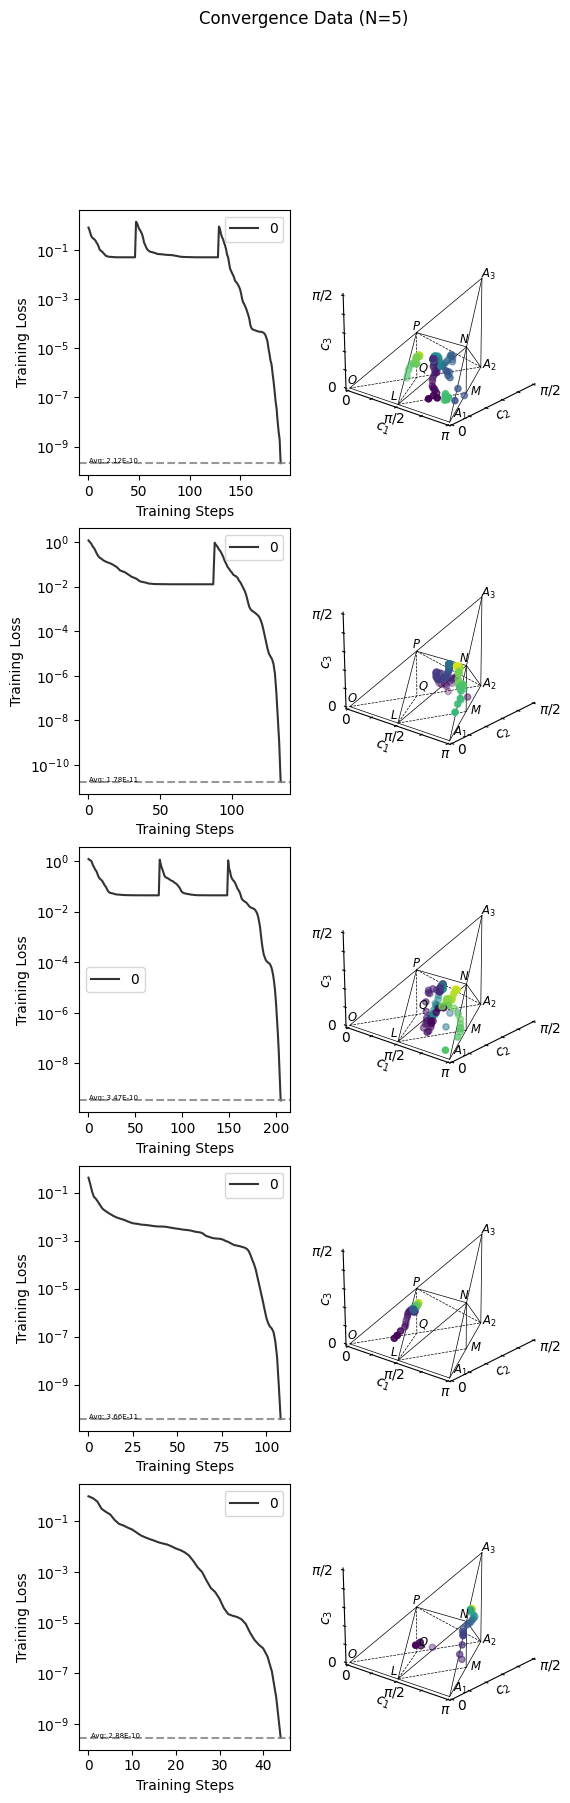

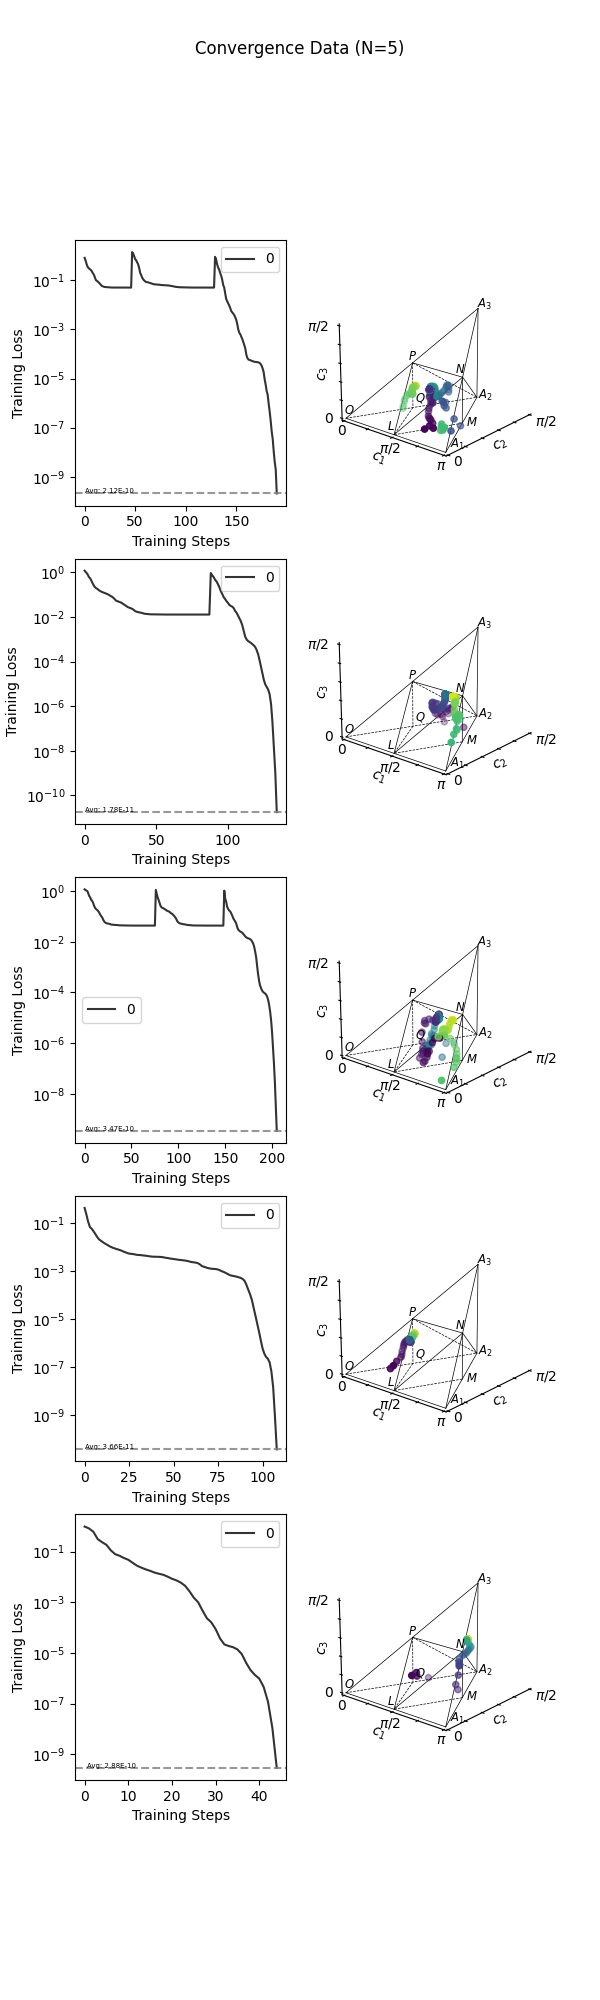

In [21]:
from slam.utils.visualize import optimizer_training_plot
optimizer_training_plot(*ret)